In [1]:
from plan_func import *
plt.rcParams['figure.figsize'] = [4,3]


## Planning: steps
1. Create Map
    1. occupancy space at time $t-1, \bar{\mathcal X}_{t-1}$
    2. bounding boxes at time $t \to $ estimate occupancy space $\hat{\mathcal X_t}$
    3. apply nondeterministic filter $\bar{\mathcal X_t}=\bar{\mathcal X}_{t-1}\cap\hat{\mathcal X_t}$
    4. add ICS to $\bar{\mathcal X_t}$
    5. convert to map with width, height, resolution
2. Plan to intermediate goal
<!-- 2. plan from start to goal
    - collision-free wrt ICS at all future $t$ if such path exists
    - collision-free wrt ICS only at $t+1$ if the above doesn't exist
    - brake if neither exists -->

### Create Map

In [2]:
A1x = 0.1;A1y = 0.1;A2x=0.2;A2y=0.2
B1x = 0.3;B1y = 0.3;B2x=0.4;B2y=0.8
C1x = 0.35;C1y = 0.6;C2x=0.45;C2y=0.7
D1x = 0.15;D1y = 0.15;D2x=0.7;D2y=0.5
# bounding boxes t-1
A = np.array([[A1x,A1y],[A2x,A2y]])
B = np.array([[B1x,B1y],[B2x,B2y]])
# bounding boxes t
C = np.array([[C1x,C1y],[C2x,C2y]])
D = np.array([[D1x,D1y],[D2x,D2y]])

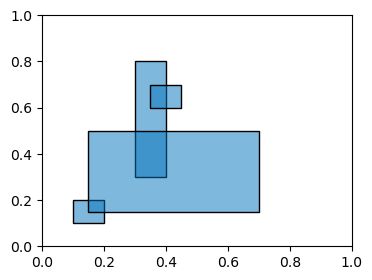

In [3]:
# visualize t-1,t with overlaps
visualize_2d(box_to_occ_space(A,B,C,D))

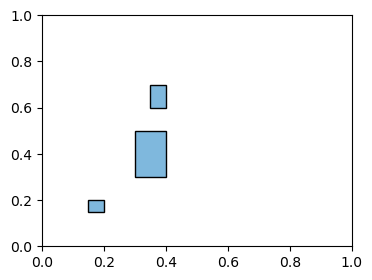

In [4]:
# apply nondeterministic filter
occ_prev = box_to_occ_space(A, B)
xhat_now = box_to_occ_space(C, D)
occ_now = non_det_filter(occ_prev, xhat_now)
# visualize updated occupancy space
visualize_2d(occ_now)

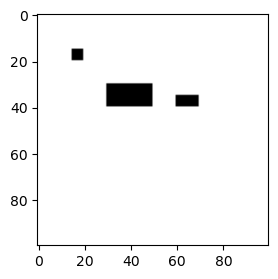

In [5]:
# convert to map for planning
# width, height, resolution
w = 1; h = 1; dx = 0.01
map_design = occ_to_map(occ_now, w, h, dx)
plt.imshow(map_design, cmap="gray") # gets flipped

### Safety Planner

In [6]:
start = [0.45,0.1,np.pi/2]
goal = [0.6,0.8,np.pi/2]

start_id = [int(np.floor(start[0]/dx)), int(np.floor(start[1]/dx)),start[2]]
goal_id = [int(np.ceil(goal[0]/dx)), int(np.ceil(goal[1]/dx)),goal[2]]

In [7]:
from safety_planner import Safety_Planner
safe_planner = Safety_Planner(occ_now,start,goal)
path_info = safe_planner.plan()

[38, 18, 1.5707963267948966]
Reached goal
Reached goal
[24, 32, 1.5707963267948966]
Reached goal
Reached goal
[10, 46, 1.5707963267948966]
Reached goal
Reached goal
[53, 18, 1.5707963267948966]
Reached goal
Reached goal
[67, 32, 1.5707963267948966]
Reached goal
Reached goal
[81, 46, 1.5707963267948966]
Reached goal
Reached goal
[40, 80, 1.5707963267948966]
Reached goal
Reached goal
[24, 38, 1.5707963267948966]
Reached goal
Reached goal
[12, 54, 1.5707963267948966]
Reached goal
Reached goal
Reached goal


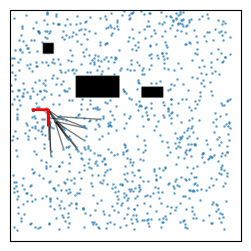

In [8]:
safe_planner.visualize_result()

### Old Plan

Reached goal


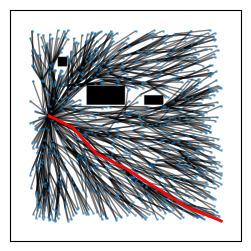

In [9]:
from fmt import FMTPlanner
fmt_planner = FMTPlanner(map_design)
path_info_plain = fmt_planner.plan([45,10],[100,100])
visualize_result(map_design, fmt_planner, path_info_plain)

Reached goal


{'path': array([[ 45.        ,  10.        ],
        [ 51.13189825,  22.4317029 ],
        [ 64.55442946,  34.48565866],
        [ 72.52542798,  50.13243819],
        [ 82.24067384,  65.34211611],
        [ 92.60265066,  81.80772252],
        [100.        , 100.        ]]),
 'n_steps': 1001,
 'cost': 106.60362545566039,
 'goal_flag': 1}

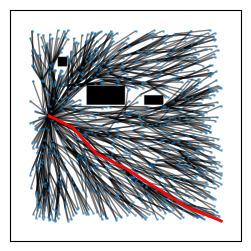

In [10]:
start = [0.45,0.1]
goal = [1,1]

start_id = [int(np.floor(start[0]/dx)), int(np.floor(start[1]/dx))]
goal_id = [int(np.ceil(goal[0]/dx)), int(np.ceil(goal[1]/dx))]

plan(map_design, start_id, goal_id)